<a href="https://colab.research.google.com/github/amazingashis/Blog/blob/main/Data_Preprocessing_Blog4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D



# **Normalizer**

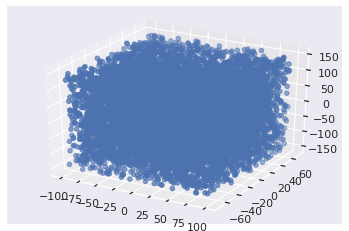

In [8]:
#Generate Data
df = pd.DataFrame({
    'x1' : np.random.randint(-100,100,10000).astype(float),
    'y1' : np.random.randint(-70,70,10000).astype(float),
    'z1' : np.random.randint(-150,150,10000).astype(float),
    })
fig = plt.figure()
ax = plt.axes(projection= '3d')
ax.scatter3D(df.x1, df.y1, df.z1)


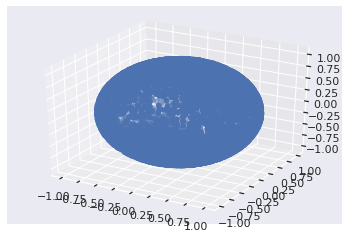

In [9]:
from sklearn.preprocessing import Normalizer
model = Normalizer()
data_tf = model.fit_transform(df)
df = pd.DataFrame(data_tf,columns = ['x1','y1','z1'])
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

# **Binarization**

In [16]:
#Generating Data
X = np.array([[1, -1, 2],
              [2, 0, 0],
              [0, 1, -1]])




In [17]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

data_tf = binarizer.fit_transform(X)
print(data_tf)

[[1 0 1]
 [1 0 0]
 [0 1 0]]


# **Encoding Categorical Values**

**Encoding Categorical Values**

In [18]:
#Generate Data
df = pd.DataFrame({
    'Age' : [33,44,22,44,55,22],
    'Income' : ['Low','Low','High','Medium','Medium','High']
})
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [20]:
df.Income.map({'Low' : 1,'Medium': 2, 'High' : 3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

## **Encoding Nominal Values**

In [22]:
df = pd.DataFrame({
    'Age' : [33,44,22,44,55,22],
    'Gender' : ['Male','Female','Male','Female','Male','Male']
})
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


# **Imputation**

In [24]:
#Generate Data
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

# **Polynomial Features**

In [26]:
#Generating Data
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [27]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])